<a href="https://colab.research.google.com/github/Chakradhar2003/Git-In/blob/master/StockSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt 
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [26]:
 pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


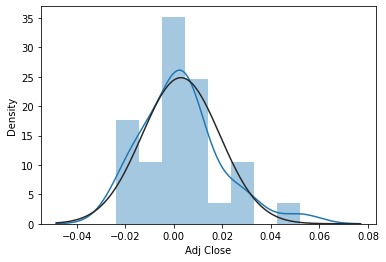

In [21]:
nflx = yf.Ticker("nflx")
data = yf.download("nflx", start='2021-09-01', end='2021-10-15')
price=data["Adj Close"]
returns=price.pct_change().dropna(how='any')
sns.distplot(returns,fit=norm) #almost follows a normal distribution

<Figure size 432x288 with 0 Axes>

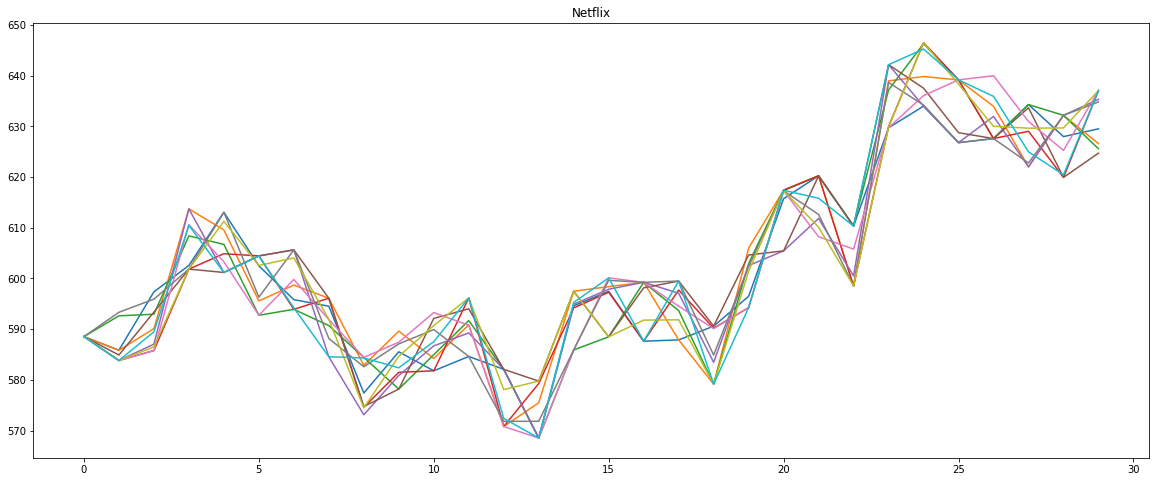

In [23]:
from scipy import random
import math

# the domain
ub = norm.ppf(0.70)
lb = norm.ppf(0.25)
mean=returns.mean()
stdev=returns.std()
np.random.seed(42)
n=np.random.normal(size=(30,10))
rows=n.shape[0]
cols=n.shape[1]
for i in range(0,rows):
  for j in range(0,cols):
    if n[i][j]>ub:
      n[i][j]=ub
    elif n[i][j]<lb:
      n[i][j]=lb
    else:
      n[i][j]=n[i][j]
    n[i][j]=(stdev*n[i][j])+mean

x=np.arange(30)
common=(n[0][0]+1)*price.iat[0]
for j in range(0,cols):
  n[0][j]=common
  for i in range(1,rows):
    n[i][j]=(n[i][j]+1)*price.iat[i]
df=pd.DataFrame(n)
plt.figure()
df.plot(legend=False,figsize=(20,8),title='Netflix')